### 実験結果をデータフレームにまとめる  

In [24]:
import pandas as pd
import os

data="FashionMNIST"
CWALDP_params = [(0.25,4,8,0),(0.25,2,8,0)]
eps_list=[1,2,3]
model="model2"
date="20260108"

all_results=[]
for unique in [False]:
    for eps in eps_list:
        for P, L, cluster_num,label_epsilon in CWALDP_params:
                filename_cwaldp = f"../../experiments/FashionMNIST/CWALDP/CNN/{date}/{unique}_unique_RR_waldp_L{L}_PI{P}_C{cluster_num}_eps{eps}_label_noise_{label_epsilon}_{model}.csv"
                if os.path.exists(filename_cwaldp):
                        df = pd.read_csv(filename_cwaldp, comment="#")
                        test_accuracy_mean = df["test_accuracy"].mean()  
                        train_accuracy_mean = df["train_accuracy"].mean()  
                        test_noise_accuracy_mean = df["test_noise_accuracy"].mean()       
                        print(f"eps: {eps}, P: {P}, L: {L}, cluster_num: {cluster_num} => test_accuracy_mean: {test_accuracy_mean}, train_accuracy_mean: {train_accuracy_mean}, test_noise_accuracy_mean: {test_noise_accuracy_mean}")             
                        all_results.append({
                            "P": P,
                            "L": L,
                            "cluster_num": cluster_num,
                            "epsilon": eps,
                            "label_epsilon": label_epsilon,
                            "test_accuracy_mean": test_accuracy_mean,
                            "train_accuracy_mean": train_accuracy_mean,
                            "test_noise_accuracy_mean": test_noise_accuracy_mean
                        })
    result_df=pd.DataFrame(all_results)
    print(result_df.sort_values(by=[ "label_epsilon","P","L","cluster_num","epsilon"]).reset_index(drop=True))

eps: 1, P: 0.25, L: 4, cluster_num: 8 => test_accuracy_mean: 0.5886733333333333, train_accuracy_mean: 0.44559000000000004, test_noise_accuracy_mean: 0.43832
eps: 1, P: 0.25, L: 2, cluster_num: 8 => test_accuracy_mean: 0.5547733333333333, train_accuracy_mean: 0.46423000000000003, test_noise_accuracy_mean: 0.45366
eps: 2, P: 0.25, L: 4, cluster_num: 8 => test_accuracy_mean: 0.67043, train_accuracy_mean: 0.6143833333333333, test_noise_accuracy_mean: 0.6062633333333333
eps: 2, P: 0.25, L: 2, cluster_num: 8 => test_accuracy_mean: 0.5940399999999999, train_accuracy_mean: 0.55997, test_noise_accuracy_mean: 0.55315
eps: 3, P: 0.25, L: 4, cluster_num: 8 => test_accuracy_mean: 0.6925333333333334, train_accuracy_mean: 0.6632066666666667, test_noise_accuracy_mean: 0.65637
eps: 3, P: 0.25, L: 2, cluster_num: 8 => test_accuracy_mean: 0.6071933333333334, train_accuracy_mean: 0.5911466666666667, test_noise_accuracy_mean: 0.5850966666666668
      P  L  cluster_num  epsilon  label_epsilon  test_accuracy

### PI=0.25

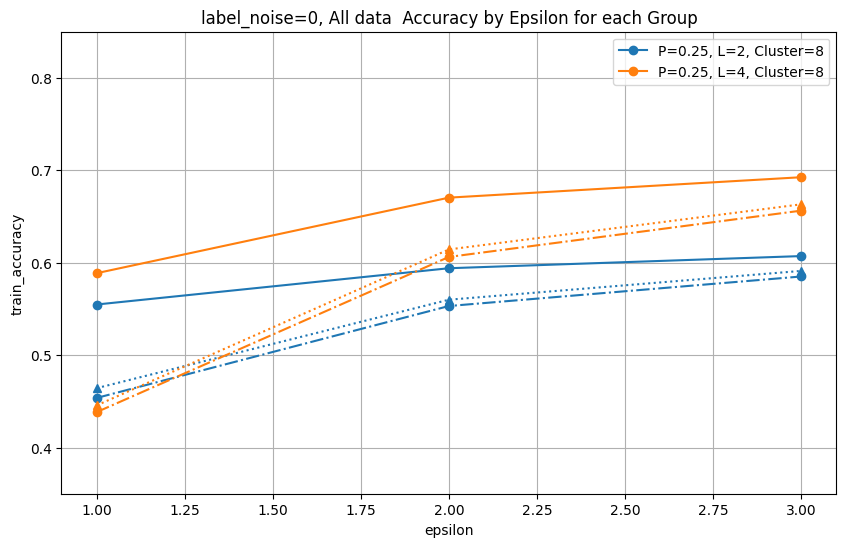

In [25]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
label_epsilon=0
# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==0.25)&(result_df["label_epsilon"]==label_epsilon)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['test_accuracy_mean'], marker='o', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('train_accuracy')
plt.ylim(0.35, 0.85)
plt.title(f'label_noise={label_epsilon}, All data  Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()

## PI=0.5のデータの比較 

/tmp/ipykernel_224830/1652808817.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() # 凡例を表示


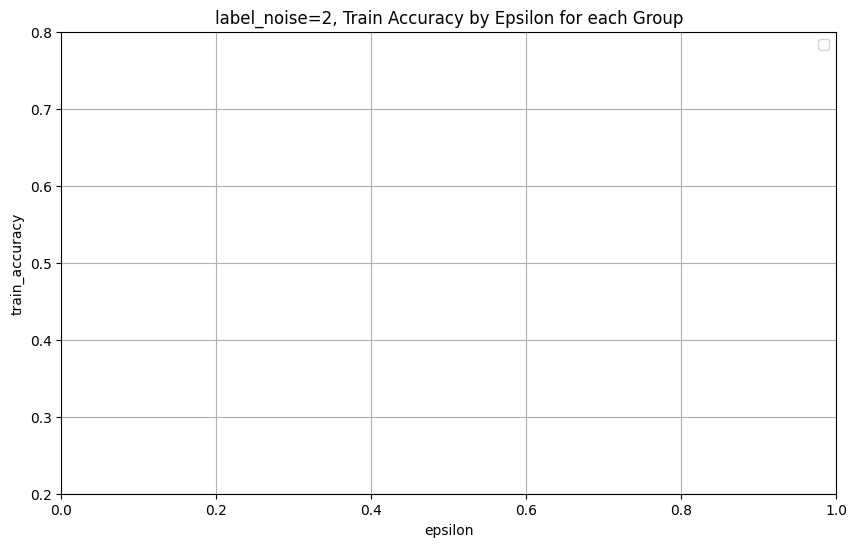

In [26]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# 'P', 'L', 'cluster_num' でグループ化してループ処理
groups = result_df[(result_df["P"]==49)&(result_df["label_epsilon"]==0)].groupby(["P","L","cluster_num"])

for name, group in groups:
    label_str = f"P={name[0]}, L={name[1]}, Cluster={name[2]}"
    
    # 1. Test Accuracy をプロット（実線 '-'）
    # 戻り値として Line2D のリストを受け取ります
    lines = plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='o', linestyle=':', label=label_str)

    # 2. 自動で割り当てられた色を取得
    color = lines[0].get_color()

    # 3. Train Accuracy をプロット（点線 '--'）
    # 取得した色 (color) を指定し、同じ色にします
    # 凡例が重複しないように label は外すか、必要に応じて変更してください
    #plt.plot(group['epsilon'], group['train_accuracy_mean'], marker='^', linestyle=':', color=color)
    #plt.plot(group['epsilon'], group['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color)

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('train_accuracy')
plt.ylim(0.2, 0.8)
plt.title('label_noise=2, Train Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)

# 表示
plt.show()

# Rapporの実験結果

In [6]:
import pandas as pd
import os
import math
data="FashionMNIST"
eps_list=[1,2,3]
model="model1"
date="20260108"
hash_number=1
label_epsilon=0
all_results=[]
for unique in [False]:
    for eps in eps_list:
                if_condition = "<"  # 実際のp範囲に応じて変更
                if if_condition == ">":
                    noise_p = 1 / (1 + math.exp(-eps / (2 * hash_number)))
                else:
                    noise_p = 1 / (1 + math.exp(eps / (2 * hash_number)))
                filename_path = f"../../experiments/{data}/Rappor/CNN/Rappor_eps{eps}_k{hash_number}_noise{noise_p}_label_noise_{label_epsilon}_{model}.csv"
                if os.path.exists(filename_path):
                        df = pd.read_csv(filename_path, comment="#")
                        test_accuracy_mean = df["test_accuracy"].mean()  
                        train_accuracy_mean = df["train_accuracy"].mean()  
                        test_noise_accuracy_mean = df["test_noise_accuracy"].mean()       
                        print(f"eps: {eps}, P: {P}, L: {L}, cluster_num: {cluster_num} => test_accuracy_mean: {test_accuracy_mean}, train_accuracy_mean: {train_accuracy_mean}, test_noise_accuracy_mean: {test_noise_accuracy_mean}")             
                        all_results.append({
                            "epsilon": eps,
                            "label_epsilon": label_epsilon,
                            "test_accuracy_mean": test_accuracy_mean,
                            "train_accuracy_mean": train_accuracy_mean,
                            "test_noise_accuracy_mean": test_noise_accuracy_mean
                        })
                else:
                    raise ValueError("Not find file_path")
    result_df=pd.DataFrame(all_results)


eps: 1, P: 0.5, L: 4, cluster_num: 10 => test_accuracy_mean: 0.3674966666666667, train_accuracy_mean: 0.5498466666666667, test_noise_accuracy_mean: 0.4165833333333333
eps: 2, P: 0.5, L: 4, cluster_num: 10 => test_accuracy_mean: 0.64192, train_accuracy_mean: 0.7583, test_noise_accuracy_mean: 0.6193333333333333
eps: 3, P: 0.5, L: 4, cluster_num: 10 => test_accuracy_mean: 0.7350866666666664, train_accuracy_mean: 0.8217166666666668, test_noise_accuracy_mean: 0.6986833333333333


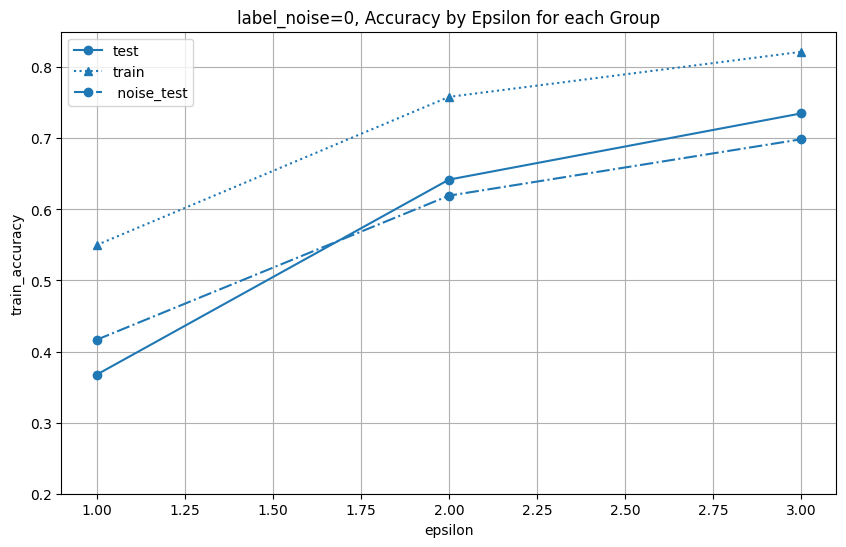

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# 1. Test Accuracy をプロット（実線 '-'）
# 戻り値として Line2D のリストを受け取ります
lines = plt.plot( result_df['epsilon'],result_df['test_accuracy_mean'], marker='o', label="test")
# 2. 自動で割り当てられた色を取得
color = lines[0].get_color()
# 3. Train Accuracy をプロット（点線 '--'）
# 取得した色 (color) を指定し、同じ色にします
# 凡例が重複しないように label は外すか、必要に応じて変更してください
plt.plot(result_df['epsilon'], result_df['train_accuracy_mean'], marker='^', linestyle=':', color=color, label="train")
plt.plot(result_df['epsilon'], result_df['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color, label=" noise_test")

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('train_accuracy')
plt.ylim(0.2, 0.85)
plt.title('label_noise=0, Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()

In [ ]:
import pandas as pd
import os

data="FashionMNIST"
CWALDP_params = [(0.5,4,10,0),(0.25,4,8,0)]
eps_list=[1,2,3]
model="model2"
date="20260109"
all_results=[]
for unique in [False]:
    for eps in eps_list:
        for P, L, cluster_num,label_epsilon in CWALDP_params:
                filename_cwaldp = f"../../experiments/FashionMNIST/CWALDP/CNN/{date}/{unique}_unique_RR_waldp_L{L}_PI{P}_C{cluster_num}_eps{eps}_label_noise_{label_epsilon}_{model}.csv"
                if os.path.exists(filename_cwaldp):
                        df = pd.read_csv(filename_cwaldp, comment="#")
                        test_accuracy_mean = df["test_accuracy"].mean()  
                        train_accuracy_mean = df["train_accuracy"].mean()  
                        test_noise_accuracy_mean = df["test_noise_accuracy"].mean()       
                        print(f"eps: {eps}, P: {P}, L: {L}, cluster_num: {cluster_num} => test_accuracy_mean: {test_accuracy_mean}, train_accuracy_mean: {train_accuracy_mean}, test_noise_accuracy_mean: {test_noise_accuracy_mean}")             
                        all_results.append({
                            "P": P,
                            "L": L,
                            "cluster_num": cluster_num,
                            "epsilon": eps,
                            "label_epsilon": label_epsilon,
                            "test_accuracy_mean": test_accuracy_mean,
                            "train_accuracy_mean": train_accuracy_mean,
                            "test_noise_accuracy_mean": test_noise_accuracy_mean
                        })
                else:
                    raise ValueError("Not find file_path")
    result_CWALDP_df=pd.DataFrame(all_results)

eps: 1, P: 0.5, L: 4, cluster_num: 10 => test_accuracy_mean: 0.6878983333333334, train_accuracy_mean: 0.6793316666666668, test_noise_accuracy_mean: 0.6597566666666665
eps: 2, P: 0.5, L: 4, cluster_num: 10 => test_accuracy_mean: 0.7643233333333335, train_accuracy_mean: 0.7621833333333333, test_noise_accuracy_mean: 0.7444550000000001
eps: 3, P: 0.5, L: 4, cluster_num: 10 => test_accuracy_mean: 0.7964116666666669, train_accuracy_mean: 0.7962666666666667, test_noise_accuracy_mean: 0.7790233333333333


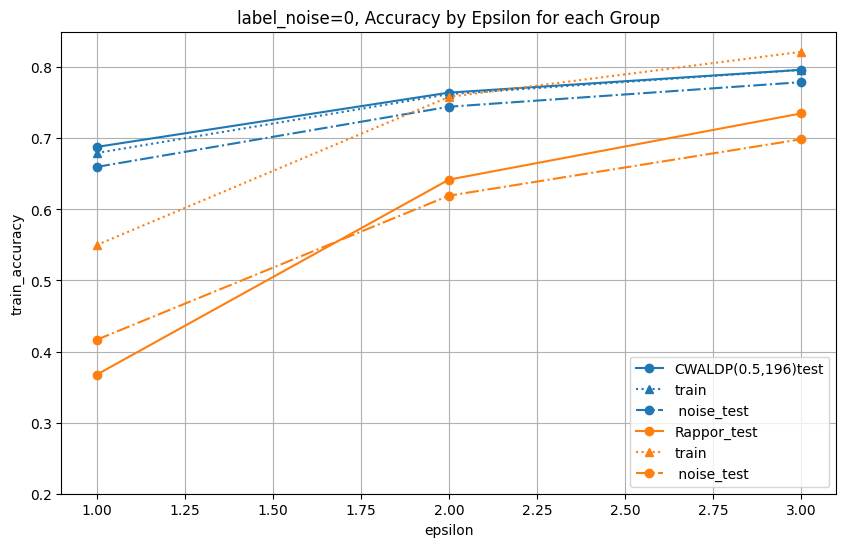

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

#CWALDP result
groups = result_CWALDP_df[(result_CWALDP_df["label_epsilon"]==0)]
# 1. Test Accuracy をプロット（実線 '-'）
# 戻り値として Line2D のリストを受け取ります
lines = plt.plot(groups['epsilon'], groups['test_accuracy_mean'], marker='o', label="CWALDP(0.5,196)test")
# 2. 自動で割り当てられた色を取得
color = lines[0].get_color()
# 3. Train Accuracy をプロット（点線 '--'）
# 取得した色 (color) を指定し、同じ色にします
# 凡例が重複しないように label は外すか、必要に応じて変更してください
plt.plot(groups['epsilon'], groups['train_accuracy_mean'], marker='^', linestyle=':', color=color, label="train")
plt.plot(groups['epsilon'], groups['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color, label=" noise_test")


#Rappor rsult
lines = plt.plot( result_df['epsilon'],result_df['test_accuracy_mean'], marker='o', label="Rappor_test")
# 2. 自動で割り当てられた色を取得
color = lines[0].get_color()
# 3. Train Accuracy をプロット（点線 '--'）
# 取得した色 (color) を指定し、同じ色にします
# 凡例が重複しないように label は外すか、必要に応じて変更してください
plt.plot(result_df['epsilon'], result_df['train_accuracy_mean'], marker='^', linestyle=':', color=color, label="train")
plt.plot(result_df['epsilon'], result_df['test_noise_accuracy_mean'], marker='o', linestyle='-.', color=color, label=" noise_test")

# ラベルとタイトルの設定
plt.xlabel('epsilon')
plt.ylabel('train_accuracy')
plt.ylim(0.2, 0.85)
plt.title('label_noise=0, Accuracy by Epsilon for each Group')
plt.legend() # 凡例を表示
plt.grid(True)
# 表示
plt.show()